<a href="https://colab.research.google.com/github/IS-UNAH/AlgoritmosGeneticos_Ejemplos/blob/main/E3_GA%5BGRUPO_5%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gen	nevals	avg    	std    	min    	max    
0  	30    	76.1019	23.7504	29.4434	125.198
1  	19    	93.8075	18.2053	54.5551	126.075
2  	17    	105.263	24.0544	-1     	136.298
3  	17    	122.3  	9.8971 	95.2865	136.298
4  	7     	130.118	5.21471	118.716	136.298
5  	15    	135.476	2.27102	125.991	136.298
6  	18    	136.144	0.830195	131.673	136.298
7  	18    	131.691	24.6406 	-1     	136.298
8  	24    	136.067	1.51592 	128.787	139.229
9  	20    	131.807	24.6659 	-1     	138.862
10 	19    	136.731	0.967801	136.298	139.022
11 	15    	132.409	24.8    	-1     	139.022
12 	21    	137.65 	1.7446  	131.85 	139.022
13 	15    	138.64 	0.801831	136.186	139.022
14 	18    	138.979	0.070589	138.862	139.022
15 	16    	134.354	25.1346 	-1     	139.022
16 	19    	138.976	0.283747	137.46 	139.222
17 	17    	138.949	0.506885	136.238	139.222
18 	21    	139.115	0.274151	139.022	140.511
19 	23    	138.932	1.4585  	131.325	140.511
20 	20    	134.84 	25.231  	-1     	140.621
21 	25    	139.734	1.11158 	134.818	140

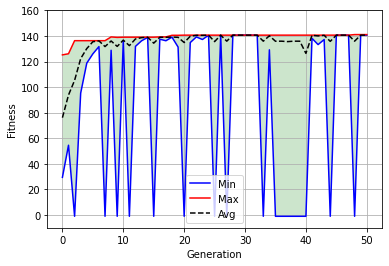

In [ ]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = math.sqrt(x[0]**2 + x[1]**2)        
    return res,

toolbox = base.Toolbox()

# Generación de genes 
toolbox.register("attr_uniform", random.uniform, -100, 100)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual, 
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual, 30)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, 
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.pdf", dpi = 300)

def main():
    random.seed(100)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 50
    pop = toolbox.population() 
    hof = tools.HallOfFame(1) 
    stats = tools.Statistics(lambda ind: ind.fitness.values) 
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, 
                                       mutpb=MUTPB, ngen=NGEN, stats=stats, 
                                       halloffame=hof, verbose=True)
    return hof, logbook 

if __name__ == "__main__":
    best, log = main()
    print("Mejor fitness: %f" %best[0].fitness.values)
    print("Mejor individuo %s" %best[0])
    plot_evolucion(log) 